In [1]:
library(tidyverse)
library(ggrepel)
library(ggtext)
library(showtext)
library(knitr)
library(kableExtra)
library(magrittr)

font_add_google("Lato")
showtext_auto()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.2
✔ purrr     1.2.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: sysfonts

Loading required package: showtextdb


Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows



Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [2]:
theme_set(theme_minimal(base_family = "Lato"))

theme_update(
  # Remove title for both x and y axes
  axis.title = element_blank(),
  # Axes labels are grey
  axis.text = element_text(color = "grey40"),
  # The size of the axes labels are different for x and y.
  axis.text.x = element_text(size = 24, margin = margin(t = 5)),
  axis.text.y = element_text(size = 20, margin = margin(r = 5)),
  # Also, the ticks have a very light grey color
  axis.ticks = element_line(color = "grey91", size = .5),
  # The length of the axis ticks is increased.
  axis.ticks.length.x = unit(1.3, "lines"),
  axis.ticks.length.y = unit(.7, "lines"),
  # Remove the grid lines that come with ggplot2 plots by default
  panel.grid = element_blank(),
  # Customize margin values (top, right, bottom, left)
  plot.margin = margin(20, 20, 20, 40),
  # Use a transparent background for both the plot and the panel
  plot.background = element_rect(fill = "transparent", color = "grey98"),
  panel.background = element_rect(fill = "transparent", color = "grey98"),
  # Customize title appearence
  plot.title = element_text(
    color = "grey10", 
    size = 16,
    face = "bold",
    margin = margin(t = 15, b = 15)
  ),
  legend.title = element_text(
    # size = 24,
    face = "bold"
  ),
  legend.text = element_text(
    # size = 20
  )
)

options(repr.plot.width=9, repr.plot.height=7)

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


In [3]:
saldo_migracji <- read_csv2("../data/LUDN_1355_CTAB_20260117210141.csv") %>%
    select(!last_col(), -"Kod") %>%
    filter(Nazwa %in% c("Bydgoszcz (1)", "Białe Błota (2)", "Osielsko (2)")) %>%
    rename_with(~ gsub("saldo migracji;ogółem;|;\\[osoba\\]", "", .)) %>%
    mutate("2015" = NA) %>%
    pivot_longer(cols = !Nazwa, names_to = "Rok", values_to = "Saldo") %>%
    mutate(Rok = as.numeric(Rok), Nazwa = str_replace(Nazwa, pattern = "\\(\\d\\)", ""))
saldo_migracji

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

New names:
• `` -> `...26`
Rows: 7 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (2): Kod, Nazwa
dbl (23): saldo migracji;ogółem;2002;[osoba], saldo migracji;ogółem;2003;[os...
lgl  (1): ...26

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Nazwa,Rok,Saldo
<chr>,<dbl>,<dbl>
Białe Błota,2002,368
Białe Błota,2003,526
Białe Błota,2004,729
Białe Błota,2005,790
Białe Błota,2006,647
Białe Błota,2007,749
Białe Błota,2008,614
Białe Błota,2009,541
Białe Błota,2010,566


In [4]:
saldo_luki <- saldo_migracji %>%
    filter(is.na(lead(Saldo)) & row_number() != n() | is.na(lag(Saldo)) & row_number() != 1) %>%
    mutate(group = cumsum(row_number() %% 2))

saldo_luki

Nazwa,Rok,Saldo,group
<chr>,<dbl>,<dbl>,<dbl>
Białe Błota,2014,330,1
Białe Błota,2016,461,1
Osielsko,2014,248,2
Osielsko,2016,322,2
Bydgoszcz,2014,-1097,3
Bydgoszcz,2016,-811,3


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Saving 6.67 x 6.67 in image
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


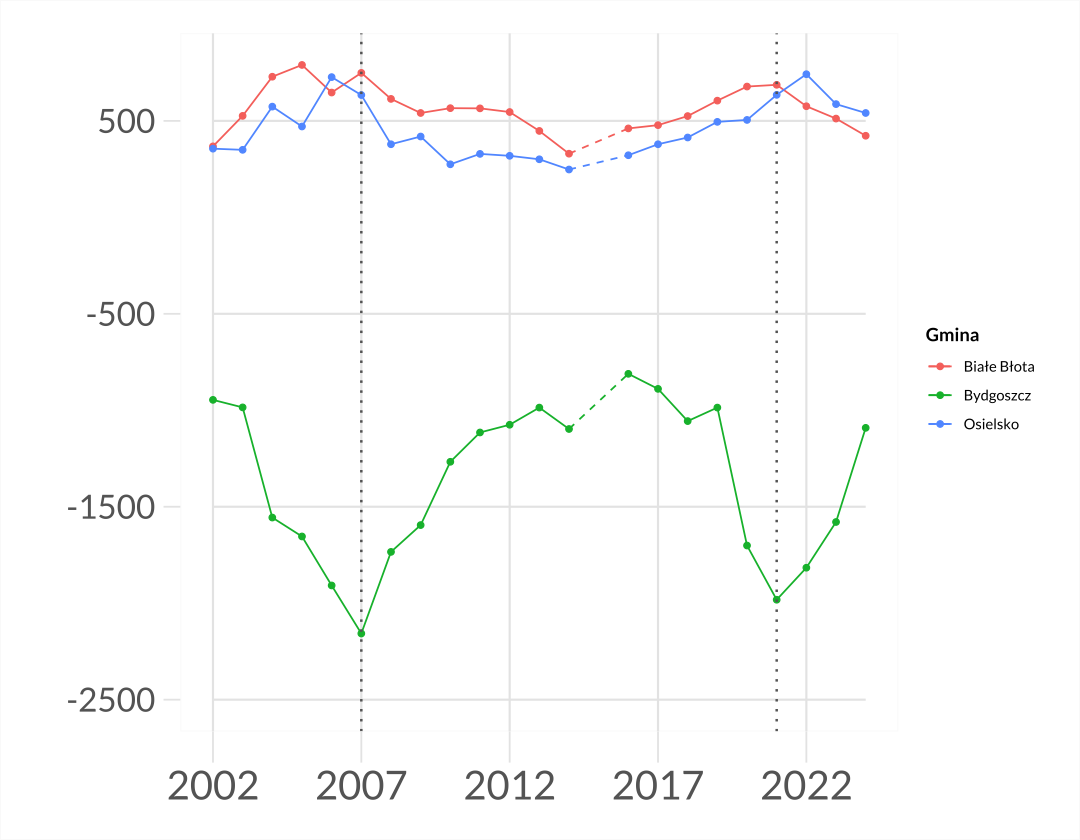

In [5]:
saldo_migracji %>%
    ggplot(aes(x=Rok, y=Saldo, group=Nazwa, color=Nazwa)) +
    geom_vline(
        xintercept = seq(2002, 2024, by = 5),
        color = "grey91", 
        size = .6
    ) +
    geom_segment(
        data = tibble(y = seq(-2500, 1000, 1000), x1 = 2002, x2 = 2024),
        aes(x = x1, xend = x2, y = y, yend = y),
        inherit.aes = FALSE,
        color = "grey91",
        size = .6
    ) +
    geom_line() +
    geom_line(data = saldo_luki, aes(group=group), linetype = "dashed") +
    geom_point() +
    geom_vline(
        xintercept = 2007,
        color = "grey40",
        linetype = "dotted",
        size = .7
    ) +
    geom_vline(
        xintercept = 2021,
        color = "grey40",
        linetype = "dotted",
        size = .7
    ) +
    scale_y_continuous(breaks = seq(-2500, 1000, 1000)) +
    scale_x_continuous(breaks = seq(2002, 2024, 5)) +
    labs(
        color = "Gmina"
    )

ggsave("../article/img/saldo_migracji.png", bg = "transparent")

In [6]:
malzenstwa <- read_csv2("../data/LUDN_3430_CTAB_20260117211320.csv") %>%
    select(!last_col(), -"Kod") %>%
    rename_with(~ gsub("ogółem;|;\\[-\\]", "", .)) %>%
    rename(Gmina = Nazwa) %>%
    mutate(Gmina = str_replace(Gmina, pattern = "\\(\\d\\)", "")) %>%
    select(Gmina, "2021", "2022", "2023", "2024")
malzenstwa

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

New names:
• `` -> `...26`
Rows: 7 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (2): Kod, Nazwa
dbl (23): ogółem;2002;[-], ogółem;2003;[-], ogółem;2004;[-], ogółem;2005;[-]...
lgl  (1): ...26

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Gmina,2021,2022,2023,2024
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Białe Błota,4.0,4.1,3.6,3.9
Dąbrowa Chełmińska,4.6,4.1,3.6,2.5
Nowa Wieś Wielka,3.6,4.3,2.7,3.3
Osielsko,3.2,4.0,3.1,4.1
Sicienko,4.9,5.6,4.1,3.3
Solec Kujawski,4.6,4.1,4.2,3.3
Bydgoszcz,4.4,4.6,4.3,4.0


In [7]:
malzenstwa %>%
    kable(format = 'latex', table.envir = "table", booktabs = TRUE) %>%
    kable_styling(latex_options = c("hold_position", "scale_down")) %>%
    add_header_above(header = c(" " = 1, "Małżeństwa zawarte na 1000 ludności" = 4))

\begin{table}[!h]
\centering
\resizebox{\ifdim\width>\linewidth\linewidth\else\width\fi}{!}{
\begin{tabular}{lrrrr}
\toprule
\multicolumn{1}{c}{ } & \multicolumn{4}{c}{Małżeństwa zawarte na 1000 ludności} \\
\cmidrule(l{3pt}r{3pt}){2-5}
Gmina & 2021 & 2022 & 2023 & 2024\\
\midrule
Białe Błota & 4.0 & 4.1 & 3.6 & 3.9\\
Dąbrowa Chełmińska & 4.6 & 4.1 & 3.6 & 2.5\\
Nowa Wieś Wielka & 3.6 & 4.3 & 2.7 & 3.3\\
Osielsko & 3.2 & 4.0 & 3.1 & 4.1\\
Sicienko & 4.9 & 5.6 & 4.1 & 3.3\\
\addlinespace
Solec Kujawski & 4.6 & 4.1 & 4.2 & 3.3\\
Bydgoszcz & 4.4 & 4.6 & 4.3 & 4.0\\
\bottomrule
\end{tabular}}
\end{table}

In [8]:
dzietnosc <- read_csv2("../data/DBW_DB_2026-01-18_0201.csv") %>%
    select("jednostka_terytorialna", "id_daty", "wartosc") %>%
    rename(Powiat = jednostka_terytorialna, Rok = id_daty, Dzietnosc = wartosc)

dzietnosc

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 46 Columns: 51
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (11): zmienna, nazwa_przekroj, jednostka_terytorialna, typ_informacji, n...
dbl (10): id_zmienna, id_przekroj, id_jednostka_terytorialna, id_typ_informa...
lgl (30): id_wymiar_3, nazwa_wymiar_3, id_pozycja_3, nazwa_pozycja_3, id_wym...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Powiat,Rok,Dzietnosc
<chr>,<dbl>,<dbl>
Powiat bydgoski,2002,1.349
Powiat bydgoski,2003,1.413
Powiat bydgoski,2004,1.373
Powiat bydgoski,2005,1.410
Powiat bydgoski,2006,1.387
Powiat bydgoski,2007,1.385
Powiat bydgoski,2008,1.519
Powiat bydgoski,2009,1.427
Powiat bydgoski,2010,1.410


Saving 6.67 x 6.67 in image


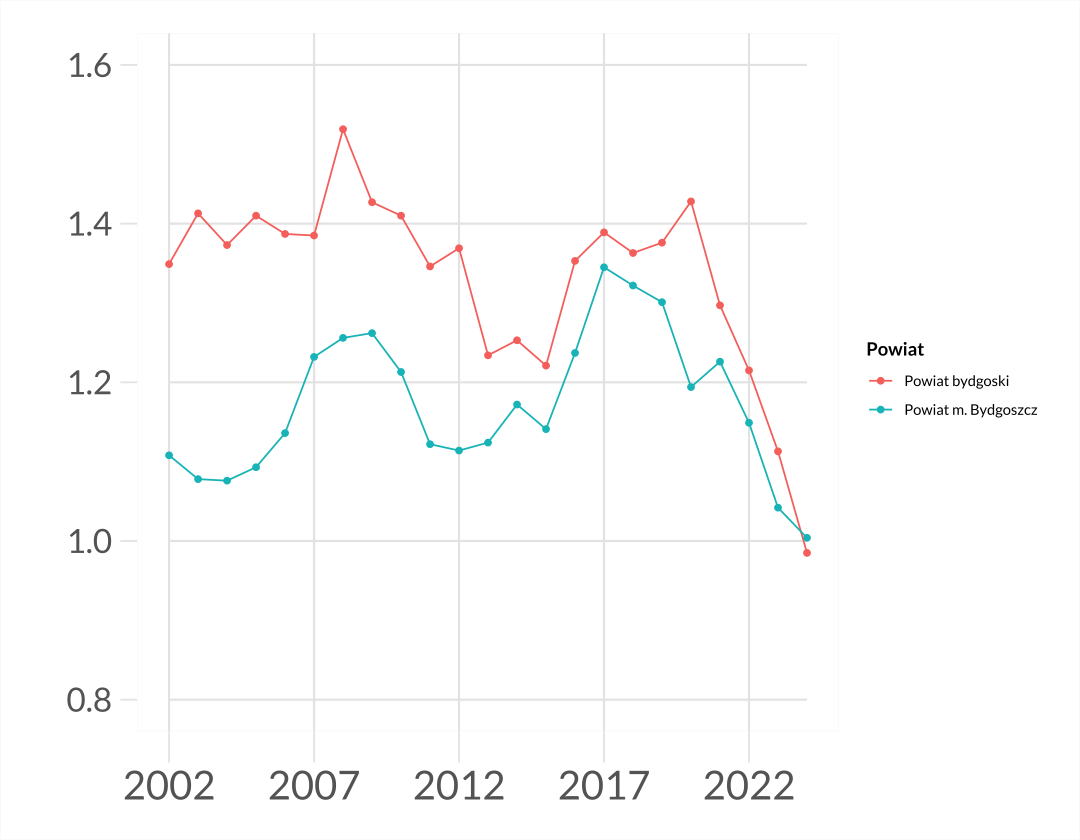

In [9]:
dzietnosc %>%
    ggplot(aes(x=Rok, y=Dzietnosc, group=Powiat, color=Powiat)) +
    geom_vline(
        xintercept = seq(2002, 2024, by = 5),
        color = "grey91", 
        size = .6
    ) +
    geom_segment(
        data = tibble(y = seq(0.8, 1.6, 0.2), x1 = 2002, x2 = 2024),
        aes(x = x1, xend = x2, y = y, yend = y),
        inherit.aes = FALSE,
        color = "grey91",
        size = .6
    ) +
    geom_line() +
    geom_point() +
    scale_y_continuous(breaks = seq(0.8, 1.6, 0.2)) +
    scale_x_continuous(breaks = seq(2002, 2024, 5)) +
    labs(color = "Powiat")

options(repr.plot.width=9, repr.plot.height=9)
ggsave("../article/img/dzietnosc.png", bg = "transparent")

In [10]:
kolejnosc_urodzen <- read_csv2("../data/DBW_DB_2026-01-18_0256.csv") %>%
    select(jednostka_terytorialna, id_daty, nazwa_pozycja_4, wartosc) %>%
    rename(Powiat = jednostka_terytorialna, Rok = id_daty, Kolejnosc = nazwa_pozycja_4, Urodzenia = wartosc)

kolejnosc_ogolem <- kolejnosc_urodzen %>%
    group_by(Powiat, Rok) %>%
    summarise(Urodzenia = sum(Urodzenia)) %>%
    ungroup()

kolejnosc_ponad_3 <- kolejnosc_urodzen %>%
    filter(Kolejnosc %in% c("3-cie dziecko", "4-te dziecko i dalsze")) %>%
    group_by(Powiat, Rok) %>%
    summarise(Urodzenia = sum(Urodzenia)) %>%
    ungroup() %>%
    mutate(Ogolem = kolejnosc_ogolem$Urodzenia) %>%
    mutate(Procent = Urodzenia / Ogolem)

kolejnosc_ponad_3

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 184 Columns: 51
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): zmienna, nazwa_przekroj, jednostka_terytorialna, typ_informacji, n...
dbl (16): id_zmienna, id_przekroj, id_jednostka_terytorialna, id_typ_informa...
lgl (18): id_wymiar_6, nazwa_wymiar_6, id_pozycja_6, nazwa_pozycja_6, id_wym...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'Powiat'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Powiat'. You can override using the
`.groups` argument.


Powiat,Rok,Urodzenia,Ogolem,Procent
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Powiat bydgoski,2002,186,917,0.2028353
Powiat bydgoski,2003,213,981,0.2171254
Powiat bydgoski,2004,164,984,0.1666667
Powiat bydgoski,2005,187,1042,0.1794626
Powiat bydgoski,2006,188,1058,0.1776938
Powiat bydgoski,2007,183,1086,0.1685083
Powiat bydgoski,2008,188,1219,0.1542248
Powiat bydgoski,2009,190,1176,0.1615646
Powiat bydgoski,2010,200,1170,0.1709402


In [11]:
kolejnosc_luki <- kolejnosc_ponad_3 %>%
    filter(is.na(lead(Procent)) & row_number() != n() | is.na(lag(Procent)) & row_number() != 1) %>%
    mutate(group = cumsum(row_number() %% 2))

kolejnosc_luki




Powiat,Rok,Urodzenia,Ogolem,Procent,group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Powiat bydgoski,2017,221,1154,0.1915078,1
Powiat bydgoski,2019,210,1126,0.1865009,1
Powiat m. Bydgoszcz,2017,476,3418,0.1392627,2
Powiat m. Bydgoszcz,2019,517,3071,0.1683491,2


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Saving 6.67 x 6.67 in image
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


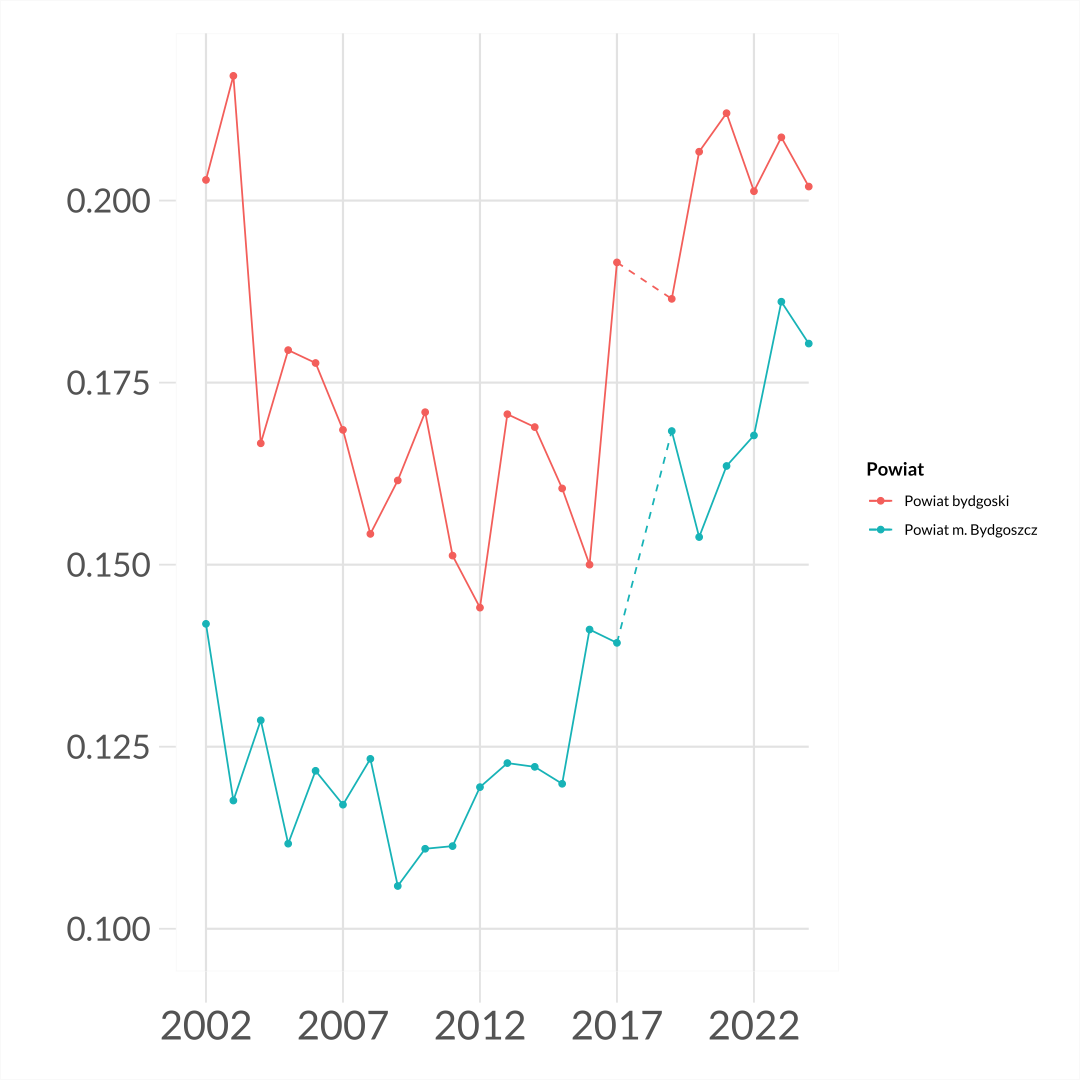

In [ ]:
kolejnosc_ponad_3 %>%
    ggplot(aes(x=Rok, y=Procent, group=Powiat, color=Powiat)) +
    geom_vline(
        xintercept = seq(2002, 2024, by = 5),
        color = "grey91", 
        size = .6
    ) +
    geom_segment(
        data = tibble(y = seq(0.1, 0.2, 0.025), x1 = 2002, x2 = 2024),
        aes(x = x1, xend = x2, y = y, yend = y),
        inherit.aes = FALSE,
        color = "grey91",
        size = .6
    ) +
    geom_line() +
    geom_line(data = kolejnosc_luki, aes(group=group), linetype = "dashed") +
    geom_point() +
    scale_y_continuous(breaks = seq(0.1, 0.2, 0.025)) +
    scale_x_continuous(breaks = seq(2002, 2024, 5))

ggsave("../article/img/kolejnosc_urodzen.png", bg = "transparent")

In [18]:
przyrost_naturalny <- read_csv2("../data/LUDN_3428_CTAB_20260118033337.csv") %>%
    select(!last_col(), -"Kod") %>%
    rename(Gmina = Nazwa) %>%
    mutate(Gmina = str_replace(Gmina, pattern = "\\(\\d\\)", "")) %>%
    rename_with(~ gsub("przyrost naturalny na 1000 ludności;|;\\[-\\]", "", .)) %>%
    select(Gmina, "2021", "2022", "2023", "2024")

przyrost_naturalny

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.



New names:
• `` -> `...26`
Rows: 7 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr  (2): Kod, Nazwa
dbl (23): przyrost naturalny na 1000 ludności;2002;[-], przyrost naturalny n...
lgl  (1): ...26

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Gmina,2021,2022,2023,2024
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Białe Błota,0.85,1.02,0.66,-0.76
Dąbrowa Chełmińska,-6.51,0.00,-0.12,-3.36
Nowa Wieś Wielka,-3.15,0.78,-0.29,-2.12
Osielsko,2.02,3.94,1.60,0.37
Sicienko,-0.48,-1.78,1.01,-1.45
Solec Kujawski,-4.46,-5.27,-3.48,-5.89
Bydgoszcz,-6.90,-5.84,-5.94,-5.67


In [19]:
przyrost_naturalny %>%
    kable(format = 'latex', table.envir = "table", booktabs = TRUE) %>%
    kable_styling(latex_options = c("hold_position", "scale_down")) %>%
    add_header_above(header = c(" " = 1, "Przyrost naturalny na 1000 ludności" = 4))


\begin{table}[!h]
\centering
\resizebox{\ifdim\width>\linewidth\linewidth\else\width\fi}{!}{
\begin{tabular}{lrrrr}
\toprule
\multicolumn{1}{c}{ } & \multicolumn{4}{c}{Przyrost naturalny na 1000 ludności} \\
\cmidrule(l{3pt}r{3pt}){2-5}
Gmina & 2021 & 2022 & 2023 & 2024\\
\midrule
Białe Błota & 0.85 & 1.02 & 0.66 & -0.76\\
Dąbrowa Chełmińska & -6.51 & 0.00 & -0.12 & -3.36\\
Nowa Wieś Wielka & -3.15 & 0.78 & -0.29 & -2.12\\
Osielsko & 2.02 & 3.94 & 1.60 & 0.37\\
Sicienko & -0.48 & -1.78 & 1.01 & -1.45\\
\addlinespace
Solec Kujawski & -4.46 & -5.27 & -3.48 & -5.89\\
Bydgoszcz & -6.90 & -5.84 & -5.94 & -5.67\\
\bottomrule
\end{tabular}}
\end{table}